In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN


from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

matplotlib.rc("axes", unicode_minus = False)
plt.rcParams['font.family'] = 'NanumGothic'

## 실습1 군집분석 
붓꽃 데이터를 이용하여 군집 분석을 하라.

In [2]:
df = pd.read_csv("IRIS.csv")
df.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df['SPECIES'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
df.describe()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df_raw = df.iloc[:,:-1]

### 데이터 표준화

In [6]:
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df_raw)

df_raw_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [7]:
df_raw_y = df = df.iloc[:,4]
df_raw_x = df_raw_scaled

In [8]:
df_raw_x

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

### 계층형 군집분석

In [9]:
Z_ward = linkage(df_raw_x, method = "ward", metric = "euclidean")
Z_average = linkage(df_raw_x, method = "average", metric = "euclidean")

In [10]:
Z_ward

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.21167870e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.21167870e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.31632184e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.31632184e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.31632184e-01, 2.00000000e+00],
       [1.27000000e+02, 1.38000000e+02, 1.33836265e-01, 2.00000000e+00],
       [2.00000000e+00, 4.70000000e+01, 1.33836265e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.43378956e-01, 2.00000000e+00],
       [1.90000000e+01, 4.60000000e+01, 1.43378956e-01, 2.00000000e+00],
       [1.00000000e+00, 2.50000000e+01, 1.66143388e-01, 2.00000000e+00],
       [1.20000000e+02, 1.43000000e+02, 1.66143388e-01, 2.00000000e+00],
       [1.10000000e+01, 2.40000000e+01, 1.70512281e-01, 2.00000000e+00],
       [4.00000000e+01, 1.54000000e+02, 1.72216546e

Text(0, 0.5, 'Distance')

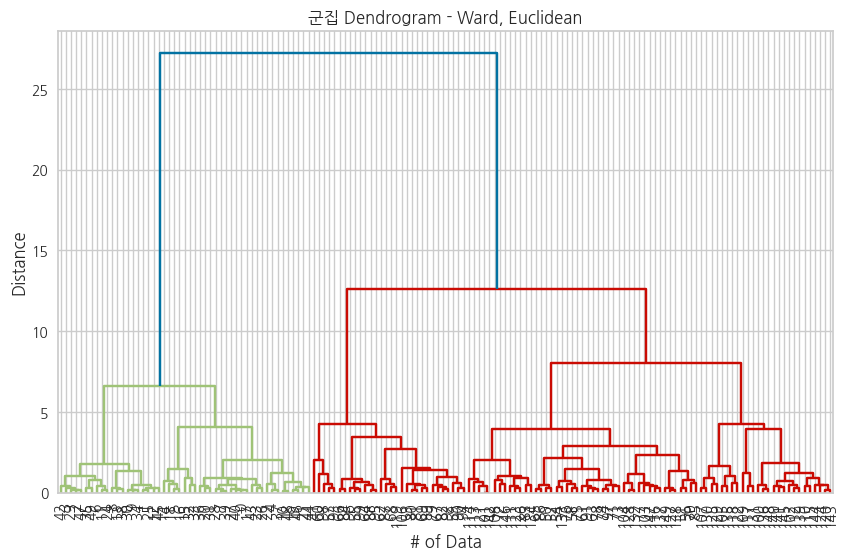

In [11]:
#덴드로그램[연결: ward, 거리 계산: Euclidean]
plt.figure(figsize=(10,6))
ax = plt.subplot(111) 
dendrogram(Z_ward, leaf_font_size=10, orientation= "top")
plt.title("군집 Dendrogram - Ward, Euclidean")
plt.xlabel("# of Data")
plt.ylabel("Distance")

Text(0, 0.5, 'Distance')

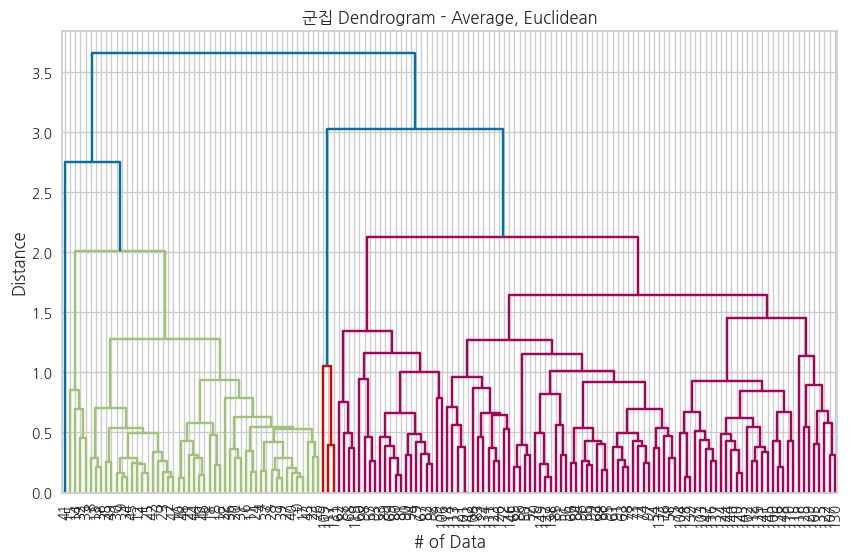

In [12]:
#덴드로그램[연결: average, 거리 계산: Euclidean]
plt.figure(figsize=(10,6))
ax = plt.subplot(111) 
dendrogram(Z_average, leaf_font_size=10, orientation= "top")
plt.title("군집 Dendrogram - Average, Euclidean")
plt.xlabel("# of Data")
plt.ylabel("Distance")

In [13]:
# linkage 함수를 통해 얻은 Z_ward 행렬 데이터를 이용하여 군집 생성
cluster_H = fcluster(Z = Z_ward, t = 10, criterion="distance")
# 데이터에 계층형 군집 결과 입력
df_raw["cluster_H"] = cluster_H
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,cluster_H
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [14]:
df_raw["cluster_H"].unique()

array([1, 2, 3], dtype=int32)

In [15]:
# 집계 함수를 이용한 군집별 데이터 요약
df_summary_H = df_raw.groupby("cluster_H").agg(["min", "mean", "max"])
level0 = df_summary_H.columns.get_level_values(0)
level1 = df_summary_H.columns.get_level_values(1)
df_summary_H.columns = level0 + "_" + level1
df_summary_H.reset_index(inplace = True)
df_summary_H.round(3)

,cluster_H,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max
0,1,4.3,5.016,5.8,2.9,3.451,4.4,1.0,1.465,1.9,0.1,0.245,0.6
1,2,4.5,5.530,6.3,2.0,2.567,3.0,1.3,3.930,5.0,0.3,1.207,1.7
2,3,5.6,6.546,7.9,2.5,2.993,3.8,4.0,5.268,6.9,1.2,1.855,2.5


array([[<Axes: title={'center': 'SEPAL_LENGTH'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'SEPAL_WIDTH'}, xlabel='cluster_H'>],
       [<Axes: title={'center': 'PETAL_LENGTH'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'PETAL_WIDTH'}, xlabel='cluster_H'>]],
      dtype=object)

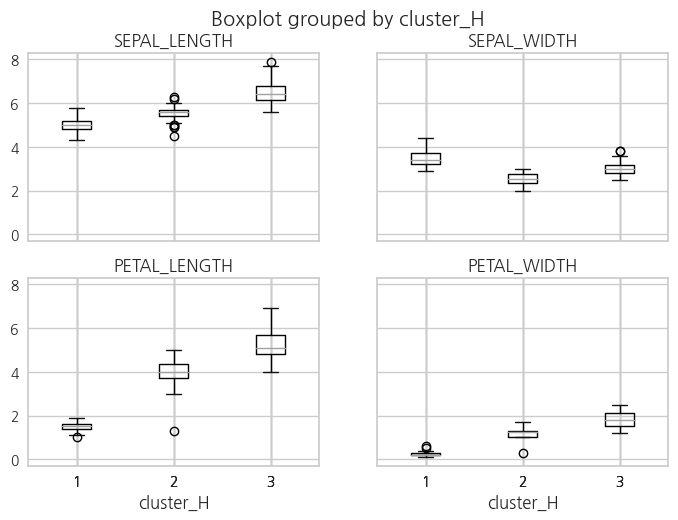

In [16]:
df_raw.boxplot(column=["SEPAL_LENGTH", "SEPAL_WIDTH","PETAL_LENGTH", "PETAL_WIDTH"]
               , by = "cluster_H")

SEPAL_WIDTH 변수를 제외한 나머지 변수들은 cluster1의 평균이 가장 낮았다.

In [24]:
df = pd.DataFrame(df)
df

,SPECIES
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


#### SEPAL을 제외한 나머지 변수의 평균은 cluster 3이 가장 높았다.


In [29]:
df_final = pd.concat([df_raw , df],axis = 1)
df_final

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,cluster_H,SPECIES
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3,virginica
146,6.3,2.5,5.0,1.9,3,virginica
147,6.5,3.0,5.2,2.0,3,virginica
148,6.2,3.4,5.4,2.3,3,virginica


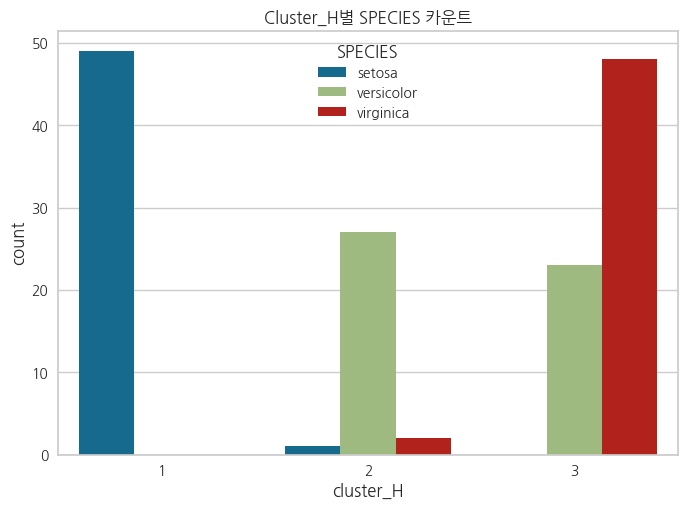

In [30]:
cluster_species_count = df_final.groupby(['cluster_H', 'SPECIES']).size().reset_index(name='count')

# 시각화
sns.barplot(x='cluster_H', y='count', hue='SPECIES', data=cluster_species_count)
plt.title('Cluster_H별 SPECIES 카운트')
plt.show()

#### 군집1에는 모두 setosa만 있는 것을 확인할 수 있다. 또한 virginica는 대체로 군집3에 해당되었다. versicolor은 군집 2와 군집3에 분포한 것을 보아 versicolor은 제대로 분류하지 못한것으로 보인다.

## k-means 군집 분석


In [31]:
df_raw

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,cluster_H
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [33]:
# 최대 군집 생성 개수
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    
    # 각 데이터로부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)
df_error = pd.DataFrame({"NumberofCluster": cluster_range, "Error": clus_error})
df_error.round(3)

,NumberofCluster,Error
0,1,600.000
1,2,222.362
2,3,139.825
3,4,114.557
4,5,102.513
5,6,83.311
6,7,73.406
7,8,67.750
8,9,54.099
9,10,54.654


Text(0, 0.5, 'Sum of Square')

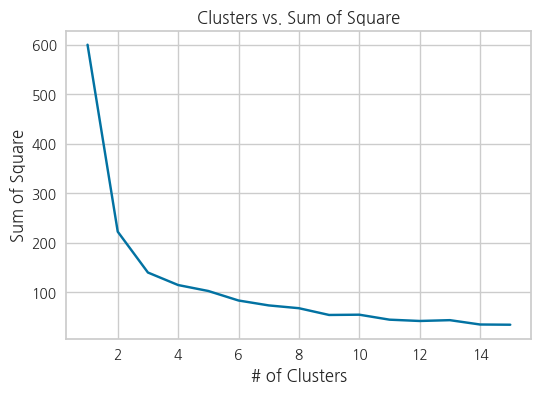

In [34]:
plt.figure(figsize=(6,4))
plt.plot(df_error["NumberofCluster"], df_error["Error"])
plt.title("Clusters vs. Sum of Square")
plt.xlabel("# of Clusters")
plt.ylabel("Sum of Square")

In [35]:
clus = KMeans(3)
clus.fit(df_raw_x)
cluster_KM = [i+1 for i in clus.labels_]
df_raw["cluster_KM"] = cluster_KM
df_raw.head(10)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,cluster_H,cluster_KM
0,5.1,3.5,1.4,0.2,1,2
1,4.9,3.0,1.4,0.2,1,2
2,4.7,3.2,1.3,0.2,1,2
3,4.6,3.1,1.5,0.2,1,2
4,5.0,3.6,1.4,0.2,1,2
5,5.4,3.9,1.7,0.4,1,2
6,4.6,3.4,1.4,0.3,1,2
7,5.0,3.4,1.5,0.2,1,2
8,4.4,2.9,1.4,0.2,1,2
9,4.9,3.1,1.5,0.1,1,2


In [36]:
df_summary_KM = df_raw.drop("cluster_H", axis = 1, inplace=False). \
    groupby("cluster_KM").agg(["min", "mean", "max"])
level0 = df_summary_KM.columns.get_level_values(0)
level1 = df_summary_KM.columns.get_level_values(1)
df_summary_KM.columns = level0 + "_" + level1
df_summary_KM.reset_index(inplace = True)
df_summary_KM.round(3)

,cluster_KM,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max
0,1,5.9,6.781,7.9,2.5,3.096,3.8,4.4,5.511,6.9,1.4,1.972,2.5
1,2,4.3,5.006,5.8,2.3,3.428,4.4,1.0,1.462,1.9,0.1,0.246,0.6
2,3,4.9,5.802,6.6,2.0,2.674,3.0,3.0,4.370,5.6,1.0,1.413,2.4


array([[<Axes: title={'center': 'SEPAL_LENGTH'}, xlabel='cluster_KM'>,
        <Axes: title={'center': 'SEPAL_WIDTH'}, xlabel='cluster_KM'>],
       [<Axes: title={'center': 'PETAL_LENGTH'}, xlabel='cluster_KM'>,
        <Axes: title={'center': 'PETAL_WIDTH'}, xlabel='cluster_KM'>]],
      dtype=object)

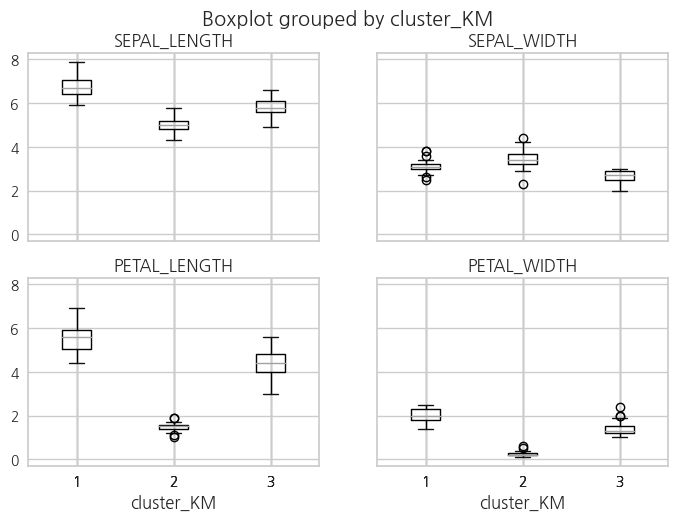

In [37]:
# Boxplot을 활용한 군집별 tjfaud변수 분포
df_raw.boxplot(column=["SEPAL_LENGTH", "SEPAL_WIDTH","PETAL_LENGTH", "PETAL_WIDTH"]
               , by = "cluster_KM")

#### 클러스트 1과 3의 평균값 차이는 크게 나지 않았고, 클러스터2는 다른 범주에 비해 평균값이 낮은것으로 나타났다.

In [38]:
df_raw

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,cluster_H,cluster_KM
0,5.1,3.5,1.4,0.2,1,2
1,4.9,3.0,1.4,0.2,1,2
2,4.7,3.2,1.3,0.2,1,2
3,4.6,3.1,1.5,0.2,1,2
4,5.0,3.6,1.4,0.2,1,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3,1
146,6.3,2.5,5.0,1.9,3,3
147,6.5,3.0,5.2,2.0,3,1
148,6.2,3.4,5.4,2.3,3,1


In [39]:
df_final = pd.concat([df_raw , df],axis = 1)
df_final

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,cluster_H,cluster_KM,SPECIES
0,5.1,3.5,1.4,0.2,1,2,setosa
1,4.9,3.0,1.4,0.2,1,2,setosa
2,4.7,3.2,1.3,0.2,1,2,setosa
3,4.6,3.1,1.5,0.2,1,2,setosa
4,5.0,3.6,1.4,0.2,1,2,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3,1,virginica
146,6.3,2.5,5.0,1.9,3,3,virginica
147,6.5,3.0,5.2,2.0,3,1,virginica
148,6.2,3.4,5.4,2.3,3,1,virginica


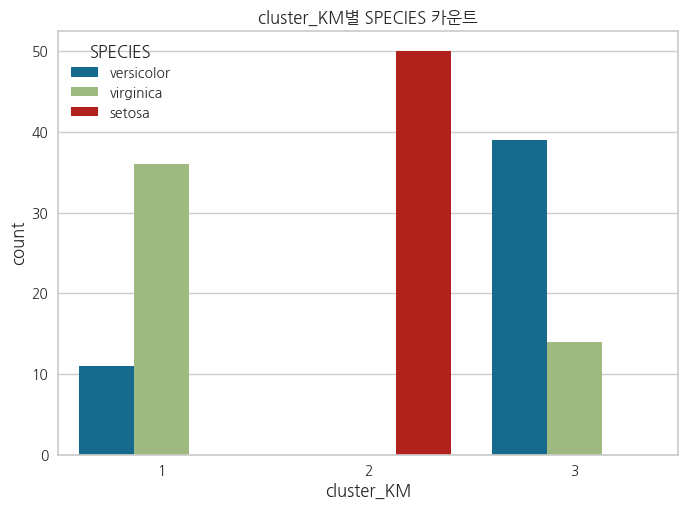

In [41]:
cluster_species_count = df_final.groupby(['cluster_KM', 'SPECIES']).size().reset_index(name='count')

# 시각화
sns.barplot(x='cluster_KM', y='count', hue='SPECIES', data=cluster_species_count)
plt.title('cluster_KM별 SPECIES 카운트')
plt.show()

#### 결론 : setosa는 완벽하게 분류를 성공했고, 클러스터1에는 virginica의 비율이 높게 나타났고, 클러스터3에는 versicolor의 비율이 높게 나타났다. 이 둘을 완벽하게 분류하는 것은 실패했다.

#### 적정 군집 수 결정

In [42]:
# scipy.cluster.hierarchy의 계층형 군집분석은 실루엣 계수 산출 안됨
# 실루엣 계수 산출:sklearn.AgglomerativeClustering(계층형군집분석)
cls_h = AgglomerativeClustering(n_clusters=3).fit_predict(df_raw_x)  # 군집 수 =3
sil_score = silhouette_score(df_raw_x, cls_h, metric='euclidean')
print( "계층형(군집 수=3) 실루엣 계수 = ",format(round(sil_score,3)))

cls_h = AgglomerativeClustering(n_clusters=4).fit_predict(df_raw_x)  # 군집 수 =4
sil_score = silhouette_score(df_raw_x, cls_h, metric='euclidean')
print( "계층형(군집 수=4) 실루엣 계수 = ",format(round(sil_score,3)))

계층형(군집 수=3) 실루엣 계수 =  0.447
계층형(군집 수=4) 실루엣 계수 =  0.401


In [43]:
# 실루엣 계수 산출:sklearn.KMeans(k평균군집분석)
cls_k = KMeans(3).fit_predict(df_raw_x)  # 군집 수 =3
sil_score = silhouette_score(df_raw_x, cls_k)
print( "k-평균(군집 수=3) 실루엣 계수 = ",format(round(sil_score,3)))

cls_k = KMeans(4).fit_predict(df_raw_x)  # 군집 수 =4
sil_score = silhouette_score(df_raw_x, cls_k)
print( "k-평균(군집 수=4) 실루엣 계수 = ",format(round(sil_score,3)))

k-평균(군집 수=3) 실루엣 계수 =  0.463
k-평균(군집 수=4) 실루엣 계수 =  0.415


실루엣 계수가 높을 수록 (1에 가까울수록) 군집이 효율적으로 형성되었다고 판단한다. <br>
군집이 3개일때 실루엣 계수가 높게 나타났다. 붓꽃의 범주가 3개여서 이렇게 나온것으로 판단된다.

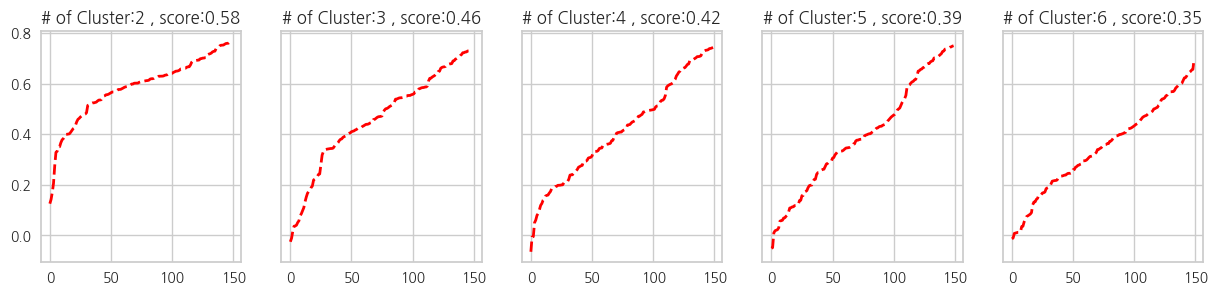

In [44]:
f, axes = plt.subplots(1, 5, sharex=True, sharey=True)
f.set_size_inches(15, 3)

for i, ax in enumerate(axes):
#     cluster_nums = AgglomerativeClustering(n_clusters=i+2).fit_predict(df_raw_x)
    cluster_nums = KMeans(n_clusters=i+2).fit_predict(df_raw_x)
    
    sil_samples = silhouette_samples(df_raw_x, cluster_nums, metric='euclidean')
    sil_score = silhouette_score(df_raw_x, cluster_nums, metric='euclidean')
    ax.plot(sorted(sil_samples), color='red',linestyle='dashed', linewidth=2)
    ax.set_title("# of Cluster:{} , score:{}".format(round(i+2), format(round(sil_score, 2))))
plt.savefig('../sil_of_cluster.svg')
plt.show()

#### 적정 군집 수는 클러스터가 2일때 실루엣 계수가 가장 높으므로 2로 선정해야한다. <br>
#### 하지만 지금은 붓꽃의 범주가 3개인 것을 이미 알고 있으므로 3으로 선정하는게 맞다.

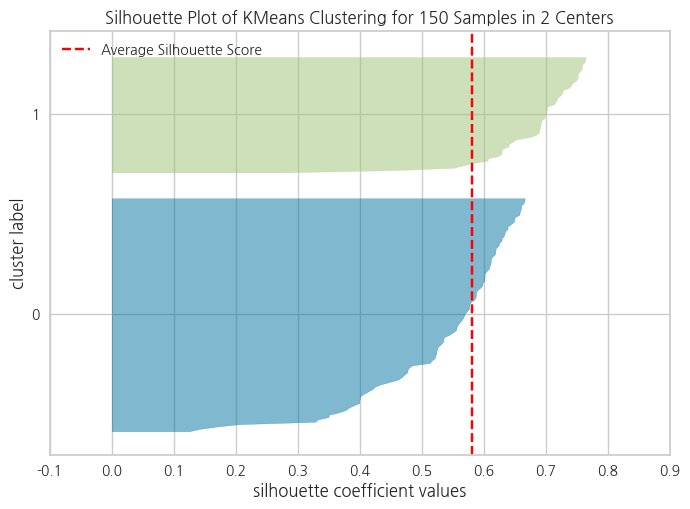

실루엣 계수 =  0.5818


In [50]:
# yellowbrick 라이브러리의 SilhouetteVisualizer 이용

clus = KMeans(2)
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')

#생성된 visualizer에 데이터 입력 
graph_sil.fit(df_raw_x)      
graph_sil.show()
print( "실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

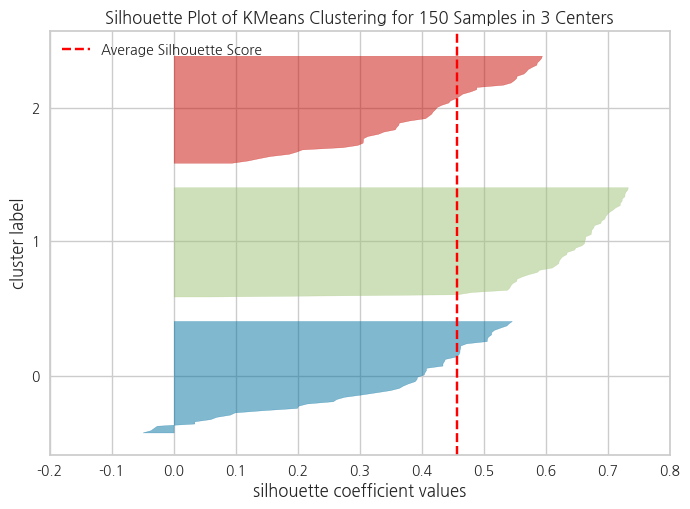

실루엣 계수 =  0.4566


In [45]:
# yellowbrick 라이브러리의 SilhouetteVisualizer 이용

clus = KMeans(3)
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')

#생성된 visualizer에 데이터 입력 
graph_sil.fit(df_raw_x)      
graph_sil.show()
print( "실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

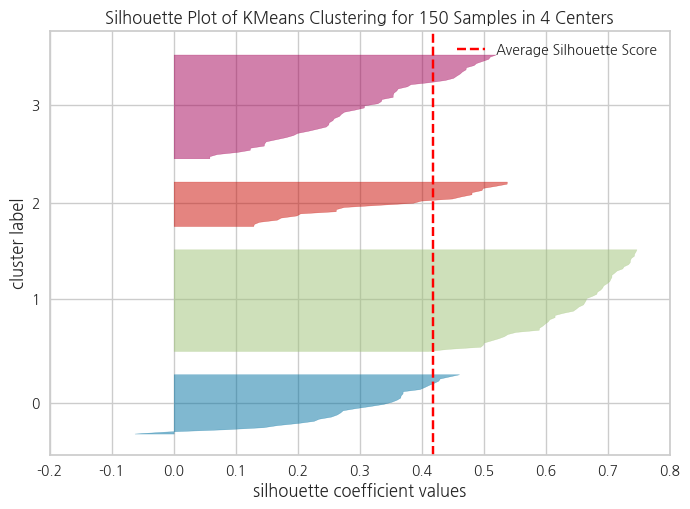

실루엣 계수 =  0.4189


In [48]:
clus = KMeans(4)

#visualizer 생성
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
graph_sil.fit(df_raw_x)      
graph_sil.show()
print( "실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

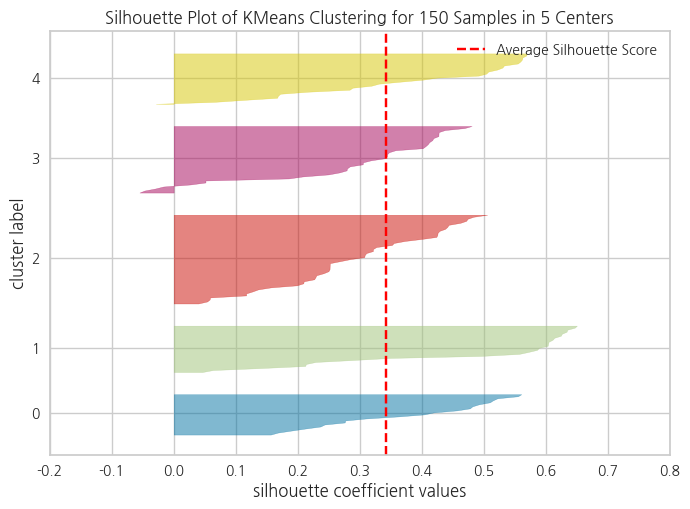

실루엣 계수 =  0.3422


In [49]:
clus = KMeans(5)

#visualizer 생성
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
graph_sil.fit(df_raw_x)      
graph_sil.show()
print( "실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

#### 클러스터가 늘어날수록  실루엣 계수가 계속해서 낮아지고 있는 것을 확인할 수 있다.
붓꽃의 범주가 3개이므로 클러스터를 3개로 하는 것이 좋을것이다.

## 실습2 

장바구니 분석

In [57]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [59]:
df_raw = pd.read_csv("구매이력.csv" , encoding = "euc-kr")
df_raw.head()

,ID,PRODUCT
0,CS-102,양주
1,CS-102,양주
2,CS-103,소다
3,CS-103,크래커
4,CS-103,맥주


In [60]:
ID = list(set(df_raw["ID"]))
ID.sort()

list_association = []
for i in ID:
    tmp_list = list(df_raw[df_raw["ID"] == i]["PRODUCT"])
    tmp_list.sort()
    list_association.append(tmp_list)

for row in list_association:
    print(row)

['양주', '양주']
['맥주', '소다', '크래커']
['맥주', '크래커']
['양주', '크래커']
['맥주', '콜라']
['맥주']
['맥주', '소다', '양주', '크래커']
['맥주']
['맥주', '콜라']
['맥주', '콜라']
['맥주', '양주', '콜라']
['맥주', '소다', '양주', '크래커']
['양주']
['맥주', '콜라']
['양주', '콜라']
['맥주', '크래커']
['맥주', '소다', '양주', '크래커']
['맥주', '소다', '양주', '크래커']
['맥주', '소다']
['소다', '양주', '크래커']
['크래커']
['양주', '콜라']
['맥주', '소다', '양주', '콜라', '크래커']
['양주', '콜라']
['맥주', '크래커']
['맥주', '소다', '크래커']
['맥주', '소다', '양주', '크래커']
['맥주']
['맥주', '콜라']
['양주', '콜라', '크래커']
['맥주', '콜라']
['맥주', '크래커']
['맥주']
['맥주', '소다', '양주', '크래커']
['맥주', '소다', '콜라']
['맥주', '콜라', '크래커']
['맥주', '양주']
['맥주', '콜라']
['맥주', '크래커']
['맥주', '소다', '양주', '크래커']
['소다', '양주', '콜라']
['맥주', '크래커']
['소다', '크래커']


In [61]:
enc = TransactionEncoder()
df_raw_enc = enc.fit_transform(X = list_association)
df_asso = pd.DataFrame(df_raw_enc, columns = enc.columns_)
df_asso.head()

,맥주,소다,양주,콜라,크래커
0,False,False,True,False,False
1,True,True,False,False,True
2,True,False,False,False,True
3,False,False,True,False,True
4,True,False,False,True,False


#### 연관규칙 생성

In [70]:
v_min_support = 0.2
df_freq = apriori(df_asso, min_support = v_min_support, use_colnames = True) # 매개값 사용
df_freq.round(3) 


,support,itemsets
0,0.744,(맥주)
1,0.349,(소다)
2,0.442,(양주)
3,0.372,(콜라)
4,0.512,(크래커)
5,0.279,"(소다, 맥주)"
6,0.233,"(양주, 맥주)"
7,0.256,"(콜라, 맥주)"
8,0.395,"(크래커, 맥주)"
9,0.233,"(소다, 양주)"


"맥주" 구매 고객비율 0.744  , "크래커" 구매 고객 비율 : 0.512, "양주" 구매 고객 비율 : 0.442 순으로 많았다.


#### 연관규칙 선택

In [75]:
# 향상도 기준

df_asso_rule = association_rules(df_freq, metric="lift" ,min_threshold = 1.3).sort_values("lift" , ascending = False)
df_asso_rule.round(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,"(양주, 크래커)",(소다),0.256,0.349,0.209,0.818,2.345,0.120,3.581,0.771
11,(소다),"(양주, 크래커)",0.349,0.256,0.209,0.600,2.345,0.120,1.860,0.881
12,(크래커),"(소다, 양주)",0.512,0.233,0.209,0.409,1.759,0.090,1.299,0.884
9,"(소다, 양주)",(크래커),0.233,0.512,0.209,0.900,1.759,0.090,4.884,0.562
8,"(소다, 크래커)",(양주),0.279,0.442,0.209,0.750,1.697,0.086,2.233,0.570
13,(양주),"(소다, 크래커)",0.442,0.279,0.209,0.474,1.697,0.086,1.370,0.736
5,"(크래커, 맥주)",(소다),0.395,0.349,0.233,0.588,1.686,0.095,1.581,0.673
6,(소다),"(크래커, 맥주)",0.349,0.395,0.233,0.667,1.686,0.095,1.814,0.625
4,"(소다, 맥주)",(크래커),0.279,0.512,0.233,0.833,1.629,0.090,2.930,0.535
7,(크래커),"(소다, 맥주)",0.512,0.279,0.233,0.455,1.629,0.090,1.322,0.790


#### 결론 : 소다를 구매한 고객에게 크래커와 양주 중 어떤 것을 추천하면 좋을까?

지지도 기준으로 크래커를 추천하면 좋을 것이다. <br>
신뢰도 기준으로 크래커를 추천하면 좋을 것이다. <br>
향상도 기준으로 크래커를 추천하면 좋을 것이다. <br>
즉 소다품목 옆에 크래커를 배치한다면 매출이 올라갈 것이다.

In [76]:
# 신뢰도 기준

df_asso_rule = association_rules(df_freq, metric="confidence" ,min_threshold = 0.7).sort_values("confidence" , ascending = False)
df_asso_rule.round(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,"(소다, 양주)",(크래커),0.233,0.512,0.209,0.900,1.759,0.090,4.884,0.562
3,"(소다, 크래커)",(맥주),0.279,0.744,0.233,0.833,1.120,0.025,1.535,0.148
4,"(소다, 맥주)",(크래커),0.279,0.512,0.233,0.833,1.629,0.090,2.930,0.535
7,"(양주, 크래커)",(소다),0.256,0.349,0.209,0.818,2.345,0.120,3.581,0.771
0,(소다),(맥주),0.349,0.744,0.279,0.800,1.075,0.019,1.279,0.107
2,(소다),(크래커),0.349,0.512,0.279,0.800,1.564,0.101,2.442,0.554
1,(크래커),(맥주),0.512,0.744,0.395,0.773,1.038,0.015,1.126,0.076
5,"(소다, 크래커)",(양주),0.279,0.442,0.209,0.750,1.697,0.086,2.233,0.570


#### 결론 : 소다를 구매한 고객에게 크래커와 맥주 중 어떤 것을 추천하면 좋을까?

지지도 기준으로 크래커와 맥주 둘다 추천하면 좋을 것이다. <br>
신뢰도 기준으로 크래커와 맥주 둘다 추천하면 좋을 것이다. <br>
향상도 기준으로 크래커를 추천하면 좋을 것이다. <br>
즉 소다품목 옆에 크를커와 맥주를 배치한다면 매출이 올라갈 것이다.